# Introduction

Correlation coefficients quantify the association between variables or features of a dataset. 

Statistics and data science are often concerned about the relationships between two or more variables (or features) of a dataset. Each data point in the dataset is an observation, and the features are the properties or attributes of those observations.

Every dataset you work with uses variables and observations. For example, you might be interested in understanding how the height of basketball players is correlated to their shooting accuracy

If you analyze any two features of a dataset, then you’ll find some type of correlation between those two features (show figure of plots here).

Each of these plots shows one of three different forms of correlation:

- Negative correlation (red dots): In the plot on the left, the y values tend to decrease as the x values increase. This shows strong negative correlation, which occurs when large values of one feature correspond to small values of the other, and vice versa.

- Weak or no correlation (green dots): The plot in the middle shows no obvious trend. This is a form of weak correlation, which occurs when an association between two features is not obvious or is hardly observable.

- Positive correlation (blue dots): In the plot on the right, the y values tend to increase as the x values increase. This illustrates strong positive correlation, which occurs when large values of one feature correspond to large values of the other, and vice versa.

When you’re analyzing correlation, you should always have in mind that correlation does not indicate causation. It quantifies the strength of the relationship between the features of a dataset. Sometimes, the association is caused by a factor common to several features of interest.

There are several statistics that you can use to quantify correlation. In this tutorial, you’ll learn about three correlation coefficients:

- Pearson’s r
- Spearman’s rho
- Kendall’s tau

Pearson’s coefficient measures linear correlation, while the Spearman and Kendall coefficients compare the ranks of data. There are several NumPy, SciPy, and Pandas correlation functions and methods that you can use to calculate these coefficients. You can also use Matplotlib to conveniently illustrate the results.

The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

Let's start by writing the Pearson's r by hand for a dummy example.

$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$

Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation. As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import *

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
x = [438.69461,
404.060132,
198.210118,
386.826542,
346.090443,
330.09382,
249.341107,
324.826081,
303.760307,
388.144244]

y = [115.343021,
89.971217,
174.421423,
155.054388,
22.921773,
352.884202,
254.11353,
176.763594,
265.541998,
222.213654]

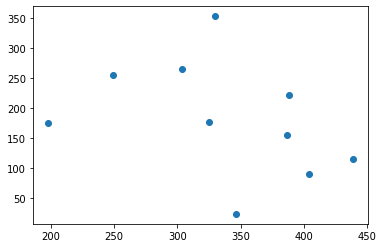

In [8]:
plt.scatter(x, y)

In [9]:
transform = list(zip(x,y)) # -> list of tuples
print(transform)

[(438.69461, 115.343021), (404.060132, 89.971217), (198.210118, 174.421423), (386.826542, 155.054388), (346.090443, 22.921773), (330.09382, 352.884202), (249.341107, 254.11353), (324.826081, 176.763594), (303.760307, 265.541998), (388.144244, 222.213654)]


In [10]:
N = len(transform)
print(N)

10


Let's recap how the covariance is defined.

$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

In [11]:
# Calculate covariance
cov = sum([(i - np.mean(x)) * (j - np.mean(y)) for i, j in zip(x, y)]) / (N-1)

In [12]:
# Calculate the standard devs of x and y
sx, sy = np.std(x, ddof=1), np.std(y, ddof=1)

In [13]:
r = cov / (sx * sy)
print(r)

-0.3630848051556617


It is clear that we do not need to write each time the code by hand. Indeed we can use different Python packages. Let's see how we can apply these packages to our data.

In [14]:
portfolio = ['BTC/USD', 'ETH/USD', 'SOL/USD', 'BNB/USD', 'LTC/USD', 'DOGE/USD']
print(len(portfolio))

6


We should now create a data structure and add data for our purposes.

In [15]:
def create_data_dictionary(portfolio):
    
    data_portfolio = {}
    
    for asset in portfolio:
        pair = asset
        pair = pair.replace('/', '-')
        df = pd.read_csv(f'../data_download_moodle/data/data_{pair}.csv')
        
        data_portfolio[asset] = df
    
    return data_portfolio

In [16]:
data_portfolio = create_data_dictionary(portfolio)

In [17]:
data_portfolio.keys()

dict_keys(['BTC/USD', 'ETH/USD', 'SOL/USD', 'BNB/USD', 'LTC/USD', 'DOGE/USD'])

In [18]:
for key in data_portfolio.keys():
    print(type(data_portfolio[key]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [19]:
data_portfolio['BTC/USD']

,Time,Open,High,Low,Close,Volume
0,2021-12-25 00:00:00,50796.0,50807.0,50566.0,50670.0,2.293749e+06
1,2021-12-25 00:05:00,50670.0,50783.0,50669.0,50741.0,2.025913e+06
2,2021-12-25 00:10:00,50741.0,50741.0,50535.0,50582.0,2.897014e+06
3,2021-12-25 00:15:00,50582.0,50681.0,50521.0,50681.0,1.785521e+06
4,2021-12-25 00:20:00,50681.0,50767.0,50652.0,50756.0,1.062458e+06
...,...,...,...,...,...,...
2587,2022-01-02 23:35:00,47239.0,47406.0,47213.0,47315.0,1.185534e+06
2588,2022-01-02 23:40:00,47315.0,47394.0,47315.0,47394.0,3.286963e+05
2589,2022-01-02 23:45:00,47394.0,47394.0,47299.0,47300.0,4.014382e+05
2590,2022-01-02 23:50:00,47300.0,47300.0,47248.0,47284.0,1.202602e+06


Let's compute log returns and create a dictionary with these new values.

In [20]:
def create_log_dict(data_portfolio):
    
    log_dict = {}
    
    for key in data_portfolio.keys():
        closing_prices = data_portfolio[key]['Close']
        log_dict[key] = (np.log(closing_prices) - np.log(closing_prices.shift(1))).dropna()
    
    return log_dict

In [21]:
log_rets_portfolio = create_log_dict(data_portfolio)

In [22]:
log_rets_portfolio_df = pd.DataFrame(log_rets_portfolio)

In [23]:
log_rets_portfolio_df

,BTC/USD,ETH/USD,SOL/USD,BNB/USD,LTC/USD,DOGE/USD
1,0.001400,-0.000074,0.000987,0.000780,0.001859,-0.001650
2,-0.003138,-0.005024,-0.005698,-0.004940,-0.005557,-0.007323
3,0.001955,0.002057,0.003868,0.003032,0.002084,0.004378
4,0.001479,0.001682,0.002251,0.001427,0.002885,0.002422
5,0.000059,-0.000321,0.001379,-0.000077,-0.000217,0.000630
...,...,...,...,...,...,...
2587,0.001608,0.000287,0.000964,0.000491,0.001357,0.001198
2588,0.001668,-0.000392,0.000651,0.000755,0.001190,0.000730
2589,-0.001985,-0.001856,-0.000750,-0.000828,-0.002149,-0.002850
2590,-0.000338,0.001203,0.001260,0.000294,-0.000033,0.000517


In [24]:
corr_matrix = log_rets_portfolio_df.corr()

In [25]:
corr_matrix

,BTC/USD,ETH/USD,SOL/USD,BNB/USD,LTC/USD,DOGE/USD
BTC/USD,1.000000,0.865205,0.721419,0.830740,0.842014,0.777542
ETH/USD,0.865205,1.000000,0.733600,0.837382,0.830682,0.768674
SOL/USD,0.721419,0.733600,1.000000,0.742351,0.709507,0.689566
BNB/USD,0.830740,0.837382,0.742351,1.000000,0.829016,0.781486
LTC/USD,0.842014,0.830682,0.709507,0.829016,1.000000,0.780631
DOGE/USD,0.777542,0.768674,0.689566,0.781486,0.780631,1.000000


<AxesSubplot:>

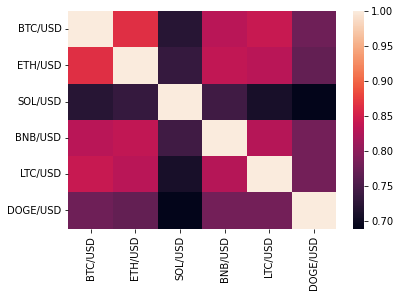

In [26]:
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

We now want to show also values.

<AxesSubplot:>

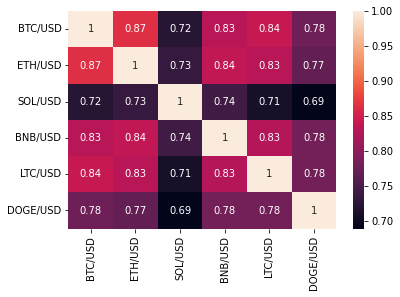

In [27]:
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, annot=True)

The correlation matrix is simmetric so we can use the upper traingular matrix.

In [28]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot:>

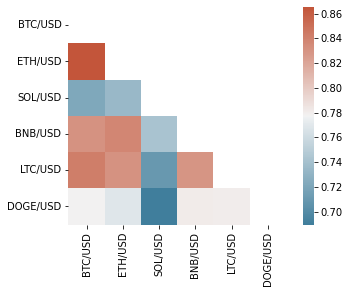

In [29]:
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, square=True)

Now you could be interested in studying the average correlation coefficient.

In [30]:
corr_matrix_2 = corr_matrix.copy()
corr_matrix_2.values[np.tril_indices_from(corr_matrix_2)] = np.nan # tril or triu

In [31]:
corr_matrix_2

,BTC/USD,ETH/USD,SOL/USD,BNB/USD,LTC/USD,DOGE/USD
BTC/USD,NaN,0.865205,0.721419,0.830740,0.842014,0.777542
ETH/USD,NaN,NaN,0.733600,0.837382,0.830682,0.768674
SOL/USD,NaN,NaN,NaN,0.742351,0.709507,0.689566
BNB/USD,NaN,NaN,NaN,NaN,0.829016,0.781486
LTC/USD,NaN,NaN,NaN,NaN,NaN,0.780631
DOGE/USD,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
print(f'Average correlation coefficient: {corr_matrix_2.unstack().mean()}')

Average correlation coefficient: 0.7826542221181481


In [33]:
print(f'Std correlation coefficient: {corr_matrix_2.unstack().std()}')

Std correlation coefficient: 0.054853799567641505


Now we want to compute the Spearman correlation coefficient.

The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

Spearman correlation is often used to evaluate relationships involving ordinal variables. For example, you might use a Spearman correlation to evaluate whether the order in which employees complete a test exercise is related to the number of months they have been employed.

In [34]:
corr_matrix = log_rets_portfolio_df.corr(method='spearman')

<AxesSubplot:>

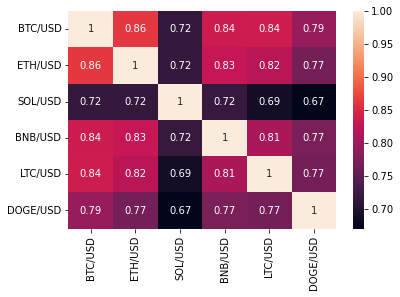

In [35]:
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, annot=True)

What about the Kendall correlation coefficient.

In [36]:
corr_matrix = log_rets_portfolio_df.corr(method='kendall')

<AxesSubplot:>

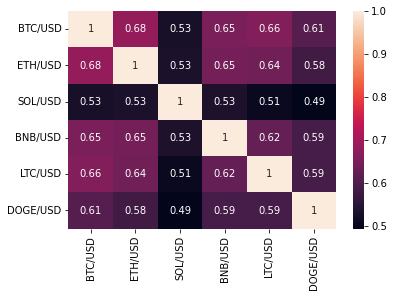

In [37]:
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, annot=True)

Let's see another way and another library to compute the correlation coefficient.

In [38]:
log_rets_portfolio_df.corr(method='pearson')

,BTC/USD,ETH/USD,SOL/USD,BNB/USD,LTC/USD,DOGE/USD
BTC/USD,1.000000,0.865205,0.721419,0.830740,0.842014,0.777542
ETH/USD,0.865205,1.000000,0.733600,0.837382,0.830682,0.768674
SOL/USD,0.721419,0.733600,1.000000,0.742351,0.709507,0.689566
BNB/USD,0.830740,0.837382,0.742351,1.000000,0.829016,0.781486
LTC/USD,0.842014,0.830682,0.709507,0.829016,1.000000,0.780631
DOGE/USD,0.777542,0.768674,0.689566,0.781486,0.780631,1.000000


Let's see what happens if we are not focused on the problem we are treating.

In [39]:
pd.DataFrame(np.corrcoef(log_rets_portfolio_df))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,0,1,2,3,4,5,6,7,8,9,...,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590
0,1.000000,0.667053,-0.633666,-0.009913,-0.204470,-0.359303,-0.306815,-0.413231,0.411732,0.763307,...,0.279131,0.722880,-0.926326,-0.572738,0.372874,0.267820,0.480377,0.473100,-0.392992,-0.735893
1,0.667053,1.000000,-0.764653,-0.654639,-0.405535,-0.268556,-0.585957,0.072263,0.685970,0.929805,...,0.453862,0.292986,-0.807128,-0.854784,0.802747,0.132115,0.352095,0.313518,-0.430166,-0.932687
2,-0.633666,-0.764653,1.000000,0.271550,0.786271,0.401010,0.369655,-0.151212,-0.631485,-0.627250,...,-0.682695,-0.181994,0.849189,0.668722,-0.818450,-0.027933,-0.108915,0.024023,0.405907,0.726445
3,-0.009913,-0.654639,0.271550,1.000000,0.262403,0.074646,0.721538,-0.182528,-0.726596,-0.627934,...,-0.039896,-0.006772,0.230053,0.488724,-0.403860,0.396604,0.116897,-0.395872,0.031577,0.666811
4,-0.204470,-0.405535,0.786271,0.262403,1.000000,0.663099,0.113307,-0.480421,-0.490050,-0.323358,...,-0.300483,0.218442,0.458051,0.142015,-0.497607,0.196031,0.068343,0.266610,0.446287,0.398978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,0.267820,0.132115,-0.027933,0.396604,0.196031,-0.201483,0.635621,0.333553,-0.619370,0.086894,...,0.030952,-0.239017,-0.054161,-0.045704,0.244716,1.000000,0.873513,-0.450797,-0.678203,0.141344
2587,0.480377,0.352095,-0.108915,0.116897,0.068343,-0.514390,0.436851,0.272755,-0.355415,0.443034,...,-0.223422,-0.049471,-0.254865,-0.065370,0.178274,0.873513,1.000000,-0.124350,-0.847161,-0.167210
2588,0.473100,0.313518,0.024023,-0.395872,0.266610,0.110832,-0.734859,-0.780388,0.594383,0.534081,...,-0.182900,0.859365,-0.420460,-0.326146,-0.211430,-0.450797,-0.124350,1.000000,0.338331,-0.584453
2589,-0.392992,-0.430166,0.405907,0.031577,0.446287,0.819475,-0.421910,-0.599999,0.151287,-0.469489,...,0.139521,0.295704,0.321457,0.010197,-0.348070,-0.678203,-0.847161,0.338331,1.000000,0.243482


Why this happens? You need to transpose log_rets_portfolio_df variable if you want to pass it as 2d array to the Numpy function to compute the correlation. But why? Let's say x is the variable we are passing to the np.corrcoef(x) function. Each row of x represents a variable, and each column a single observation of all those variables.

Let's see the solution to this problem.

In [40]:
pd.DataFrame(np.corrcoef(log_rets_portfolio_df.T), columns=log_rets_portfolio_df.columns, index=log_rets_portfolio_df.columns)

,BTC/USD,ETH/USD,SOL/USD,BNB/USD,LTC/USD,DOGE/USD
BTC/USD,1.000000,0.865205,0.721419,0.830740,0.842014,0.777542
ETH/USD,0.865205,1.000000,0.733600,0.837382,0.830682,0.768674
SOL/USD,0.721419,0.733600,1.000000,0.742351,0.709507,0.689566
BNB/USD,0.830740,0.837382,0.742351,1.000000,0.829016,0.781486
LTC/USD,0.842014,0.830682,0.709507,0.829016,1.000000,0.780631
DOGE/USD,0.777542,0.768674,0.689566,0.781486,0.780631,1.000000


SciPy also has many statistics routines contained in scipy.stats. You can use the following methods to calculate the three correlation coefficients you saw earlier. It also gives us the possibility to look at the pval.

Randomness is probably one of the most powerful phenomena that we have at hand when dealing with Statistics. It may not be so apparent, but under the right scope, it can help us uncover hidden patterns in data. Traditionally speaking though, we rely on analytical solutions to do Hypothesis Testing. Think of the t-test to compare the means of two distributions or the Pearson correlation to measure a linear dependency between two variables. The significance of these statistics always rely on a p value. 

In [41]:
log_rets_portfolio_df

,BTC/USD,ETH/USD,SOL/USD,BNB/USD,LTC/USD,DOGE/USD
1,0.001400,-0.000074,0.000987,0.000780,0.001859,-0.001650
2,-0.003138,-0.005024,-0.005698,-0.004940,-0.005557,-0.007323
3,0.001955,0.002057,0.003868,0.003032,0.002084,0.004378
4,0.001479,0.001682,0.002251,0.001427,0.002885,0.002422
5,0.000059,-0.000321,0.001379,-0.000077,-0.000217,0.000630
...,...,...,...,...,...,...
2587,0.001608,0.000287,0.000964,0.000491,0.001357,0.001198
2588,0.001668,-0.000392,0.000651,0.000755,0.001190,0.000730
2589,-0.001985,-0.001856,-0.000750,-0.000828,-0.002149,-0.002850
2590,-0.000338,0.001203,0.001260,0.000294,-0.000033,0.000517


In [42]:
corr, pval = stats.pearsonr(log_rets_portfolio_df['BTC/USD'], log_rets_portfolio_df['SOL/USD'])

In [43]:
print(corr)

0.7214188665844052


In [44]:
print(pval)

0.0


If your p-value is close to 0, the observed correlation is unlikely to be due to chance and there is a very high probability that your null hypothesis is wrong. In this case you must accept the alternative (H1) hypothesis that there is a correlation between your data sets.

Confidence in a relationship is formally determined not just by the correlation coefficient but also by the number of pairs in your data. If there are very few pairs then the coefficient needs to be very close to 1 or –1 for it to be deemed ‘statistically significant’, but if there are many pairs then a coefficient closer to 0 can still be considered ‘highly significant’.

The standard method that statisticians use to measure the ‘significance’ of their empirical analyses is the p-value. Suppose we are trying to determine if the relationship between height and intelligence of people is significant; then we start with the ‘null hypothesis’ which, in this case is the statement ‘height and intelligence of people are unrelated’. The p-value is a number between 0 and 1 representing the probability that this data would have arisen if the null hypothesis were true. In medical trials the null hypothesis is typically of the form that ‘the use of drug X to treat disease Y is no better than not using any drug’.

# Correlation significance (from shuffled null model)

Empirical

In [92]:
import copy
import random

#Compute ground truth correlation:
[r,pv] = stats.pearsonr(log_rets_portfolio_df['BTC/USD'], log_rets_portfolio_df['SOL/USD'])

#Copy one of the features:
pS = copy.copy(log_rets_portfolio_df['BTC/USD'])

#Initialize variables:
pR = []

#Choose number of permutations:
p=1000

#Initialize permutation loop:
for i in range(0,p):
  #Shuffle one of the features:
    random.shuffle(pS.values)
    #Computed permuted correlations and store them in pR:
    pR.append(stats.pearsonr(pS,log_rets_portfolio_df['SOL/USD'])[0])

#Significance:
p_val = len(np.where(np.abs(pR)>=np.abs(r))[0])/p

print(p_val, pv)

0.0 0.0


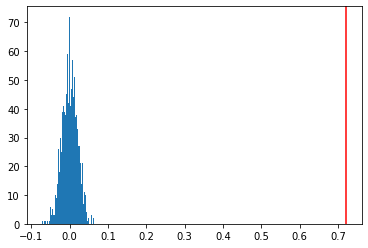

In [93]:
plt.hist(pR, bins=50)
plt.axvline(r,color='red')

Stat

In [95]:
t_val = (r * np.sqrt(len(log_rets_portfolio_df['BTC/USD']) - 2)) / (np.sqrt(1 - (r*r)))

In [97]:
from scipy.stats import t

#calculate p-value
1 - t.cdf(x=t_val, df=len(log_rets_portfolio_df['BTC/USD']) - 2)

0.0

# Granger Causality

Why Granger Causality? Spurious regression has to be eliminated while building the model since they are unrelated and have no causal relationship (example of chicken and crude oil).

Prof. Clive W.J. Granger, recipient of the 2003 Nobel Prize in Economics developed the concept of causality to improve the performance of forecasting.

It is basically an econometric hypothetical test for verifying the usage of one variable in forecasting another in multivariate time series data with a particular lag.

A prerequisite for performing the Granger Causality test is that the data need to be stationary i.e it should have a constant mean, constant variance, and no seasonal component.

Null Hypothesis (H0) : BTC/USD returns do not granger cause SOL/USD returns.

Alternative Hypothesis (HA) : BTC/USD returns granger cause SOL/USD returns.

In [84]:
from statsmodels.tsa.stattools import grangercausalitytests

In [89]:
granger_res = grangercausalitytests(log_rets_portfolio_df[['SOL/USD', 'BTC/USD']], maxlag=8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.8109 , p=0.0004  , df_denom=2587, df_num=1
ssr based chi2 test:   chi2=12.8258 , p=0.0003  , df=1
likelihood ratio test: chi2=12.7941 , p=0.0003  , df=1
parameter F test:         F=12.8109 , p=0.0004  , df_denom=2587, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.4197  , p=0.0006  , df_denom=2584, df_num=2
ssr based chi2 test:   chi2=14.8680 , p=0.0006  , df=2
likelihood ratio test: chi2=14.8255 , p=0.0006  , df=2
parameter F test:         F=7.4197  , p=0.0006  , df_denom=2584, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.3339  , p=0.0012  , df_denom=2581, df_num=3
ssr based chi2 test:   chi2=16.0451 , p=0.0011  , df=3
likelihood ratio test: chi2=15.9956 , p=0.0011  , df=3
parameter F test:         F=5.3339  , p=0.0012  , df_denom=2581, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.3068  , p=0.

All test results, dictionary keys are the number of lags. For each lag the values are a tuple, with the first element a dictionary with test statistic, pvalues, degrees of freedom, the second element are the OLS estimation results for the restricted model, the unrestricted model and the restriction (contrast) matrix for the parameter f_test.

p-value is very low, Null hypothesis is rejected hence  BTC/USD returns granger cause SOL/USD returns.

Repeat the test in the contrary direction.

In [90]:
granger_res = grangercausalitytests(log_rets_portfolio_df[['BTC/USD', 'SOL/USD']], maxlag=8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9957  , df_denom=2587, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9957  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9957  , df=1
parameter F test:         F=0.0000  , p=0.9957  , df_denom=2587, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0457  , p=0.3516  , df_denom=2584, df_num=2
ssr based chi2 test:   chi2=2.0954  , p=0.3507  , df=2
likelihood ratio test: chi2=2.0946  , p=0.3509  , df=2
parameter F test:         F=1.0457  , p=0.3516  , df_denom=2584, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9846  , p=0.3990  , df_denom=2581, df_num=3
ssr based chi2 test:   chi2=2.9617  , p=0.3976  , df=3
likelihood ratio test: chi2=2.9601  , p=0.3978  , df=3
parameter F test:         F=0.9846  , p=0.3990  , df_denom=2581, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.0310  , p=0.

The p-value is considerably high thus SOL/USD returns do not granger cause BTC/USD returns.